<a href="https://colab.research.google.com/github/jijan67/Crop-Recommendation-System-Using-ANN-With-98.18-Accuracy/blob/main/Crop_Recommendation_System_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')


In [ ]:
# Encode the target labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
class_names = le.classes_


In [ ]:
# Split features and labels
X = df.drop('label', axis=1)
y = df['label']


In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)


In [ ]:
# Define the ANN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.3385 - loss: 2.6908 - val_accuracy: 0.6182 - val_loss: 1.3992
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7425 - loss: 1.0135 - val_accuracy: 0.8227 - val_loss: 0.5335
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8904 - loss: 0.4060 - val_accuracy: 0.9045 - val_loss: 0.3073
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9293 - loss: 0.2522 - val_accuracy: 0.9455 - val_loss: 0.2216
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9488 - loss: 0.1780 - val_accuracy: 0.9500 - val_loss: 0.1806
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9634 - loss: 0.1345 - val_accuracy: 0.9409 - val_loss: 0.1665
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9657 - loss: 0.1122 - val_accuracy: 0.9591 - val_loss: 0.1464
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9611 - loss: 0.1236 - val_accuracy: 0.9682 - 

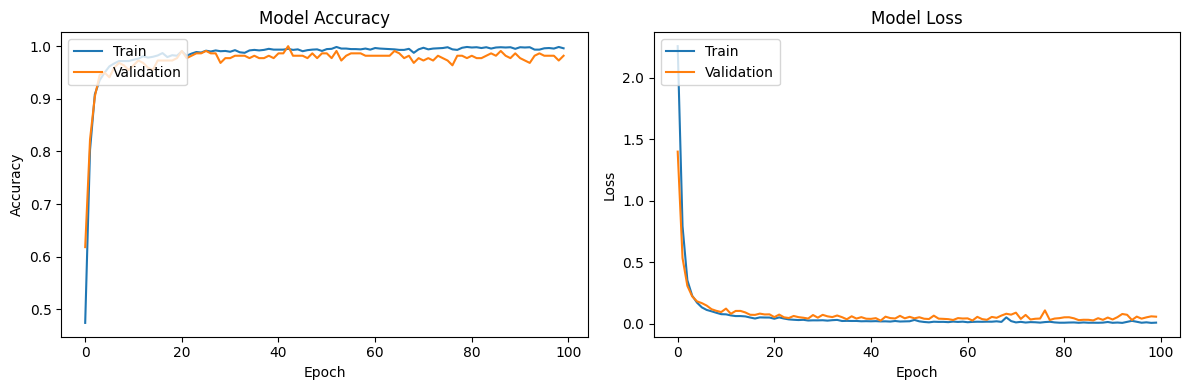

In [ ]:
# Plotting accuracy and loss curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy: {:.4f}".format(test_accuracy))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9788 - loss: 0.0666 
Test Loss: 0.056229885667562485
Test Accuracy: 0.9818


In [ ]:
# Get predicted labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         9
      banana       1.00      1.00      1.00        12
   blackgram       1.00      0.92      0.96        13
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00         9
      cotton       1.00      1.00      1.00         6
      grapes       1.00      1.00      1.00         8
        jute       1.00      1.00      1.00        11
 kidneybeans       1.00      0.85      0.92        13
      lentil       0.78      1.00      0.88         7
       maize       1.00      1.00      1.00        12
       mango       1.00      1.00      1.00         4
   mothbeans       0.91      0.91      0.91        11
    mungbean       1.00      1.00      1.00        10
   muskmelon       1.00      1.00      1.00         7
      orange       1

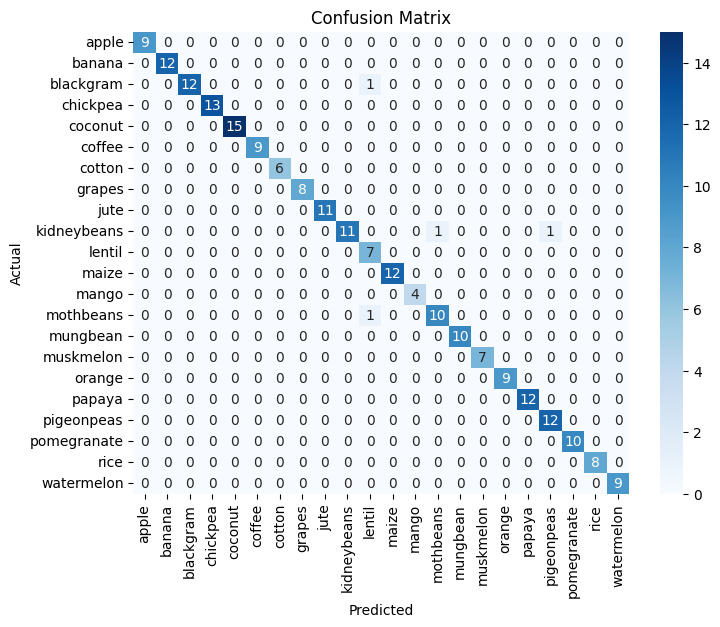

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

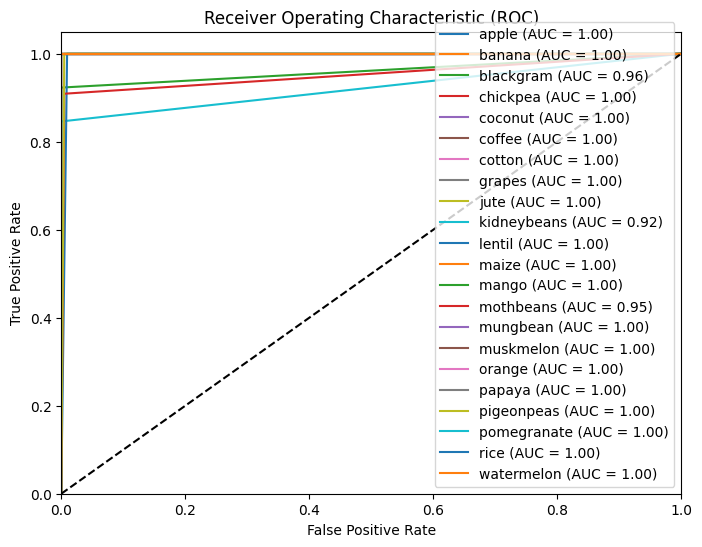

In [ ]:
# Generate ROC curve and calculate AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
y_pred_dummies = pd.get_dummies(y_pred_classes, drop_first=False).values

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_pred_dummies[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Function to recommend crop based on input features
def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    input_data = scaler.transform([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = model.predict(input_data)
    predicted_class = np.argmax(prediction)
    recommended_crop = le.inverse_transform([predicted_class])[0]
    return recommended_crop

# Sample input features
N = 90
P = 42
K = 43
temperature = 25
humidity = 86
ph = 6.5
rainfall = 220

# Make prediction
recommended_crop = recommend_crop(N, P, K, temperature, humidity, ph, rainfall)
print("Recommended Crop:", recommended_crop)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Recommended Crop: rice
